# 第一章 Pandas基础

In [1]:
import pandas as pd
import numpy as np

# 加上这两行可以一次性输出多个变量而不用print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 查看版本
pd.__version__

pd.set_option('display.max_columns', None)


## 一、文件的读取和写入

### 读取
Pandas常用的有以下三种文件：  
csv文件  
txt文件  
xls/xlsx文件
  
读取文件时的注意事项：  
文件路径是否正确，相对路径 ./data   
编码方式 
分隔符  
列名  



In [2]:
df = pd.read_csv('./data./table.csv')
df.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


In [3]:
# 直接读取可能会出现数据都挤在一列上
df_txt = pd.read_table('./data./table.txt')
#df_txt = pd.read_table('./data./table.csv', sep=",")
df_txt.head() 

,col1,col2,col3,col4
0,2,a,1.4,apple
1,3,b,3.4,banana
2,6,c,2.5,orange
3,5,d,3.2,lemon


In [4]:
df_excel = pd.read_excel('./data./table.xlsx')
df_excel.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


### 写入
将结果输出到csx/txt/xls/xlsx文件中

In [5]:
df.to_csv('./new table.csv')

In [6]:
df.to_excel('./new table.xlsx')

## 二、基本数据结构
pandas处理的基本数据结构有 Series 和 DataFrame。  
  
**区别**：  
series，只是一个一维数据结构，它由index和value组成。     
dataframe，是一个二维结构，除了拥有index和value之外，还拥有column。  
**联系**：  
dataframe由多个series组成，无论是行还是列，单独拆分出来都是一个series。  

### Series
创建   
访问属性  
取出某元素  
调用方法  

In [7]:
# 创建
# Series常见属性有 values， index， name， dtype
s = pd.Series(np.random.randn(5), index=['a','b','c','d','e'], name='this is a series', dtype='float64')
s

a   -0.770351
b    1.840992
c   -0.472317
d    0.489029
e    0.595697
Name: this is a series, dtype: float64

In [8]:
# 访问series属性
s.values, s.index, s.name, s.dtype

(array([-0.77035097,  1.84099212, -0.47231686,  0.48902904,  0.59569665]),
 Index(['a', 'b', 'c', 'd', 'e'], dtype='object'),
 'this is a series',
 dtype('float64'))

In [9]:
# 取数
# 通过索引取数;位置取数
s['a'], s[2:], s[1]

(-0.7703509708916285,
 c   -0.472317
 d    0.489029
 e    0.595697
 Name: this is a series, dtype: float64,
 1.8409921166642287)

(0.336609994815125,
 1.683049974075625,
 <matplotlib.axes._subplots.AxesSubplot at 0x16b0e841978>)

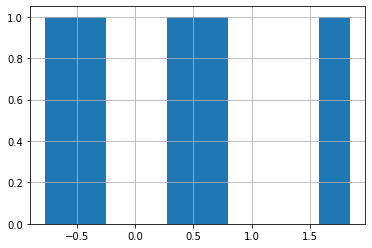

In [10]:
# 调用方法
s.mean(), s.sum(), s.hist()

In [11]:
# 非常多，用到了再慢慢积累
print([attr for attr in dir(s) if not attr.startswith('_')])

['T', 'a', 'abs', 'add', 'add_prefix', 'add_suffix', 'agg', 'aggregate', 'align', 'all', 'any', 'append', 'apply', 'argmax', 'argmin', 'argsort', 'array', 'asfreq', 'asof', 'astype', 'at', 'at_time', 'attrs', 'autocorr', 'axes', 'b', 'between', 'between_time', 'bfill', 'bool', 'c', 'clip', 'combine', 'combine_first', 'convert_dtypes', 'copy', 'corr', 'count', 'cov', 'cummax', 'cummin', 'cumprod', 'cumsum', 'd', 'describe', 'diff', 'div', 'divide', 'divmod', 'dot', 'drop', 'drop_duplicates', 'droplevel', 'dropna', 'dtype', 'dtypes', 'duplicated', 'e', 'empty', 'eq', 'equals', 'ewm', 'expanding', 'explode', 'factorize', 'ffill', 'fillna', 'filter', 'first', 'first_valid_index', 'floordiv', 'ge', 'get', 'groupby', 'gt', 'hasnans', 'head', 'hist', 'iat', 'idxmax', 'idxmin', 'iloc', 'index', 'infer_objects', 'interpolate', 'is_monotonic', 'is_monotonic_decreasing', 'is_monotonic_increasing', 'is_unique', 'isin', 'isna', 'isnull', 'item', 'items', 'iteritems', 'keys', 'kurt', 'kurtosis', 'la

### DataFrame
创建  
取一列/取一行  
修改行或列名  
调用属性和方法  
索引对齐特性  
列的删除和添加   
根据类型选择列  

In [12]:
# 创建
# DataFrame基本属性有 values， columns， index
df = pd.DataFrame({'col1':list('abcde'), 'col2':range(5,10),'col3':[1.3,2.5,3.6,4.6,5.8]},
                index=list('一二三四五'))
df

,col1,col2,col3
一,a,5,1.3
二,b,6,2.5
三,c,7,3.6
四,d,8,4.6
五,e,9,5.8


In [13]:
# 取一列/取一行  
df['col1'], df[:1]

(一    a
 二    b
 三    c
 四    d
 五    e
 Name: col1, dtype: object,
   col1  col2  col3
 一    a     5   1.3)

In [14]:
type(df), type(df['col1']), type(df[:1])

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame)

In [15]:
# 修改行或列名  
df.rename(index={'一':'one'}, columns={'col1':'new_col1'})

,new_col1,col2,col3
one,a,5,1.3
二,b,6,2.5
三,c,7,3.6
四,d,8,4.6
五,e,9,5.8


In [16]:
# 调用属性和方法  
df.index, df.columns, df.values, df.shape, df.mean()

(Index(['一', '二', '三', '四', '五'], dtype='object'),
 Index(['col1', 'col2', 'col3'], dtype='object'),
 array([['a', 5, 1.3],
        ['b', 6, 2.5],
        ['c', 7, 3.6],
        ['d', 8, 4.6],
        ['e', 9, 5.8]], dtype=object),
 (5, 3),
 col2    7.00
 col3    3.56
 dtype: float64)

In [17]:
# 索引对齐特性  
# 这是Pandas中非常强大的特性，不理解这一特性有时就会造成一些麻烦
# 在对多个DataFrame 进行合并或者加减乘除操作时，行和列的索引都重叠的时候才能进行相应操作，否则会使用NA值进行填充
df1 = pd.DataFrame({'A':[1,2,3]},index=[1,2,3])
df2 = pd.DataFrame({'A':[1,2,3]},index=[3,1,2])

df1-df2 #由于索引对齐，因此结果不是0

,A
1,-1
2,-1
3,2


In [18]:
# 列的删除
# 对于删除而言，可以使用drop函数或del或pop

# 直接drop不会影响原DataFrame，设置inplace=True后会直接在原DataFrame中改动
df.drop(index='五', columns='col1') 

# del会直接改变原dataframe
df['col1']=[1,2,3,4,5]
del df['col1']
df

# pop方法直接在原来的DataFrame上操作，且返回被删除的列，与python中的pop函数类似
df['col1']=[1,2,3,4,5]
df.pop('col1')

,col2,col3
一,5,1.3
二,6,2.5
三,7,3.6
四,8,4.6


,col2,col3
一,5,1.3
二,6,2.5
三,7,3.6
四,8,4.6
五,9,5.8


一    1
二    2
三    3
四    4
五    5
Name: col1, dtype: int64

In [116]:
# 列的添加
# 直接新增
df1['B'] = list('abc')
df1

# 用assign方法
# assign方法不会改变原DataFrame
df1.assign(C=pd.Series(list('def')))
df1
# df.assign 效果其实是左连接
# 之所以会出现NaN的情况，是因为C和df的索引不一致导致。打印一下可以看到，df的索引是1-3，而C默认的是0-4，
C=pd.Series(list('def'))
C

,A,B
1,1,a
2,2,b
3,3,c


,A,B,C
1,1,a,e
2,2,b,f
3,3,c,NaN


,A,B
1,1,a
2,2,b
3,3,c


0    d
1    e
2    f
dtype: object

In [20]:
# 根据类型选择列 
df.select_dtypes(include=['number'])
df.select_dtypes(include=['float'])

,col2,col3
一,5,1.3
二,6,2.5
三,7,3.6
四,8,4.6
五,9,5.8


,col3
一,1.3
二,2.5
三,3.6
四,4.6
五,5.8


### Series和DataFrame相互转换
DataFrame转换为Series  
就是取某一列的操作  
  
Series转换为DataFrame  
to_frame() 方法

In [21]:
s = df.mean()
s.name = 'to_DataFrame'
s

col2    7.00
col3    3.56
Name: to_DataFrame, dtype: float64

In [22]:
s.to_frame()

# T符号可以进行转置操作
s.to_frame().T

,to_DataFrame
col2,7.00
col3,3.56


,col2,col3
to_DataFrame,7.0,3.56


### 三、常用基本函数
head tail  
unique nunique  
count value_counts  
describe info  
idxmax nlargest    
clip replace  
apply

In [23]:
# 读取数据
df = pd.read_csv('./data/table.csv')

#### 1. head tail  
用来显示数据头部或者尾部的几行数据，默认是5行  
可以指定n参数显示多少行  

In [24]:
df.head()
df.tail()
df.head(6)

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
30,S_2,C_4,2401,F,street_2,192,62,45.3,A
31,S_2,C_4,2402,M,street_7,166,82,48.7,B
32,S_2,C_4,2403,F,street_6,158,60,59.7,B+
33,S_2,C_4,2404,F,street_2,160,84,67.7,B
34,S_2,C_4,2405,F,street_6,193,54,47.6,B


,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+
5,S_1,C_2,1201,M,street_5,188,68,97.0,A-


#### 2. unique nunique  
unique显示所有的唯一值是什么  
nunique显示有多少个唯一值  
  
注意： 需要在具体列上操作，本身DataFrame并没有这两个方法

In [25]:
df['Physics'].unique()
df['Physics'].nunique()

array(['A+', 'B+', 'B-', 'A-', 'B', 'A', 'C'], dtype=object)

7

#### 3. count value_counts  
count返回非缺失值元素个数  
value_counts返回每个元素有多少个值  
  
也是作用在具体某列上  

In [26]:
df['Physics'].count()
df['Physics'].value_counts()

35

B+    9
B     8
B-    6
A     4
A-    3
A+    3
C     2
Name: Physics, dtype: int64

#### 4. describe info  
info()  函数返回有哪些列、有多少非缺失值、每列的类型  
describe()  默认统计数值型数据的各个统计量  
  
describe()可以自行选择分位数位置  
非数值型特征需要单独调用describe方法  

In [27]:
df.info()
df.describe()

# describe()可以自行选择分位数位置
df.describe(percentiles=[.05, .25, .75, .95])

# 非数值型特征需要单独调用describe方法
df['Physics'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   School   35 non-null     object 
 1   Class    35 non-null     object 
 2   ID       35 non-null     int64  
 3   Gender   35 non-null     object 
 4   Address  35 non-null     object 
 5   Height   35 non-null     int64  
 6   Weight   35 non-null     int64  
 7   Math     35 non-null     float64
 8   Physics  35 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.6+ KB


,ID,Height,Weight,Math
count,35.00000,35.000000,35.000000,35.000000
mean,1803.00000,174.142857,74.657143,61.351429
std,536.87741,13.541098,12.895377,19.915164
min,1101.00000,155.000000,53.000000,31.500000
25%,1204.50000,161.000000,63.000000,47.400000
50%,2103.00000,173.000000,74.000000,61.700000
75%,2301.50000,187.500000,82.000000,77.100000
max,2405.00000,195.000000,100.000000,97.000000


,ID,Height,Weight,Math
count,35.00000,35.000000,35.000000,35.000000
mean,1803.00000,174.142857,74.657143,61.351429
std,536.87741,13.541098,12.895377,19.915164
min,1101.00000,155.000000,53.000000,31.500000
5%,1102.70000,157.000000,56.100000,32.640000
25%,1204.50000,161.000000,63.000000,47.400000
50%,2103.00000,173.000000,74.000000,61.700000
75%,2301.50000,187.500000,82.000000,77.100000
95%,2403.30000,193.300000,97.600000,90.040000
max,2405.00000,195.000000,100.000000,97.000000


count     35
unique     7
top       B+
freq       9
Name: Physics, dtype: object

#### 5. idxmax nlargest    
idxmax函数返回最大值对应的索引，在某些情况下特别适用，idxmin功能类似  
nlargest函数返回前几个大的元素值，nsmallest功能类似  
  
需要指定具体列

In [28]:
df['Math'].idxmax()
df['Math'].max()
df['Math'].nlargest(2)

5

97.0

5     97.0
28    95.5
Name: Math, dtype: float64

#### 6. clip replace  
clip和replace是两类替换函数：  
clip是对超过或者低于某些值的数进行截断  
numpy.clip(a, a_min, a_max, out=None)  

replace是对某些值进行替换  
  
**操作本身不改变原DataFrame**

In [29]:
df['Math'].head()
df['Math'].clip(33,80).head() # 低于33的全都显示为33， 高于80的全都显示为80
df['Math'].mad()

0    34.0
1    32.5
2    87.2
3    80.4
4    84.8
Name: Math, dtype: float64

0    34.0
1    33.0
2    80.0
3    80.0
4    80.0
Name: Math, dtype: float64

16.924244897959188

In [30]:
df['Address'].head()
df['Address'].replace(['street_1','street_2'],['one','two']).head()

# 还可以通过字典方式修改
df.replace({'Address':{'street_1':'one','street_2':'two'}}).head()

0    street_1
1    street_2
2    street_2
3    street_2
4    street_4
Name: Address, dtype: object

0         one
1         two
2         two
3         two
4    street_4
Name: Address, dtype: object

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,one,173,63,34.0,A+
1,S_1,C_1,1102,F,two,192,73,32.5,B+
2,S_1,C_1,1103,M,two,186,82,87.2,B+
3,S_1,C_1,1104,F,two,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


#### 7. apply
apply和匿名函数 lambda结合使用，可以很方便的进行一些数据处理  
对于Series，它可以迭代每一列的值(行)操作  
对于DataFrame，它可以迭代每一个列操作

In [31]:
df['Math'].apply(lambda x:str(x)+'!').head() # 遍历Math列中的所有值，添加！
df.apply(lambda x:x.apply(lambda x:str(x)+'!')).head() # 先是遍历所有列，然后遍历每列的所有的值，添加！

0    34.0!
1    32.5!
2    87.2!
3    80.4!
4    84.8!
Name: Math, dtype: object

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1!,C_1!,1101!,M!,street_1!,173!,63!,34.0!,A+!
1,S_1!,C_1!,1102!,F!,street_2!,192!,73!,32.5!,B+!
2,S_1!,C_1!,1103!,M!,street_2!,186!,82!,87.2!,B+!
3,S_1!,C_1!,1104!,F!,street_2!,167!,81!,80.4!,B-!
4,S_1!,C_1!,1105!,F!,street_4!,159!,64!,84.8!,B+!


### 四、排序
索引排序  
值排序  
  
单纯操作不影响元DataFrame

In [32]:
# 索引排序
df.set_index('Math').head() #set_index函数可以设置索引，将在下一章详细介绍
df.set_index('Math').sort_index().head() #可以设置ascending参数，默认为升序，True

# 值排序
df.sort_values(by='Class').head()
df.sort_values(by=['Address','Height']).head()

,School,Class,ID,Gender,Address,Height,Weight,Physics
Math,,,,,,,,
34.0,S_1,C_1,1101,M,street_1,173,63,A+
32.5,S_1,C_1,1102,F,street_2,192,73,B+
87.2,S_1,C_1,1103,M,street_2,186,82,B+
80.4,S_1,C_1,1104,F,street_2,167,81,B-
84.8,S_1,C_1,1105,F,street_4,159,64,B+


,School,Class,ID,Gender,Address,Height,Weight,Physics
Math,,,,,,,,
31.5,S_1,C_3,1301,M,street_4,161,68,B+
32.5,S_1,C_1,1102,F,street_2,192,73,B+
32.7,S_2,C_3,2302,M,street_5,171,88,A
33.8,S_1,C_2,1204,F,street_5,162,63,B
34.0,S_1,C_1,1101,M,street_1,173,63,A+


,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
19,S_2,C_1,2105,M,street_4,170,81,34.2,A
18,S_2,C_1,2104,F,street_5,159,97,72.2,B+
16,S_2,C_1,2102,F,street_6,161,61,50.6,B+
15,S_2,C_1,2101,M,street_7,174,84,83.3,C


,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
11,S_1,C_3,1302,F,street_1,175,57,87.7,A-
23,S_2,C_2,2204,M,street_1,175,74,47.2,B-
33,S_2,C_4,2404,F,street_2,160,84,67.7,B
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-


### 五、问题与练习

#### 1. 问题
##### 【问题一】 Series和DataFrame有哪些常见属性和方法？
  
属性：  
Series 有 values index name dtype;  
DataFrame 有 values index columns dtype  
  
方法：  
两者都有 size shape head tail等  
常见统计量方法等  

##### 【问题二】 value_counts会统计缺失值吗？
不会

In [74]:
df.head()
df['Address'].value_counts()
# 修改数值
df.loc[1,'Address'] = np.NaN
df.head()
df['Address'].value_counts()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,NaN,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


street_4    8
street_6    6
street_7    6
street_5    6
street_2    5
street_1    3
Name: Address, dtype: int64

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,NaN,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


street_4    8
street_6    6
street_7    6
street_5    6
street_2    5
street_1    3
Name: Address, dtype: int64

##### 【问题三】 与idxmax和nlargest功能相反的是哪两组函数？
idxmin  
nsmallest

##### 【问题四】 在常用函数一节中，由于一些函数的功能比较简单，因此没有列入，现在将它们列在下面，请分别说明它们的用途并尝试使用。
##### sum/mean/median/mad/min/max/abs/std/var/quantile/cummax/cumsum/cumprod


sum   所有值和  
mean   平均数  
median  中位数  
mad   平均绝对方差  
min  最小值  
max  最大值  
abs 绝对值  
std  标准差  
var 方差  
quantile  分位数    
cummax  累计最大值  
cumsum  累加  
cumprod 累乘   

In [34]:
df['Math'].sum()
df['Math'].mean()
df['Math'].median()
df['Math'].mad()
df['Math'].min()
df['Math'].max()
df['Math'].abs()
df['Math'].std()
df['Math'].var()
df['Math'].quantile(0.75) # DataFrame.quantile(self, q=0.5, axis=0, numeric_only=True, interpolation='linear')
df['Math'].cummax() # 
df['Math'].cumsum()
df['Math'].cumprod()

2147.3

61.35142857142858

61.7

16.924244897959188

31.5

97.0

0     34.0
1     32.5
2     87.2
3     80.4
4     84.8
5     97.0
6     63.5
7     58.8
8     33.8
9     68.4
10    31.5
11    87.7
12    49.7
13    85.2
14    61.7
15    83.3
16    50.6
17    52.5
18    72.2
19    34.2
20    39.1
21    68.5
22    73.8
23    47.2
24    85.4
25    72.3
26    32.7
27    65.9
28    95.5
29    48.9
30    45.3
31    48.7
32    59.7
33    67.7
34    47.6
Name: Math, dtype: float64

19.915163767821735

396.61374789915965

77.1

0     34.0
1     34.0
2     87.2
3     87.2
4     87.2
5     97.0
6     97.0
7     97.0
8     97.0
9     97.0
10    97.0
11    97.0
12    97.0
13    97.0
14    97.0
15    97.0
16    97.0
17    97.0
18    97.0
19    97.0
20    97.0
21    97.0
22    97.0
23    97.0
24    97.0
25    97.0
26    97.0
27    97.0
28    97.0
29    97.0
30    97.0
31    97.0
32    97.0
33    97.0
34    97.0
Name: Math, dtype: float64

0       34.0
1       66.5
2      153.7
3      234.1
4      318.9
5      415.9
6      479.4
7      538.2
8      572.0
9      640.4
10     671.9
11     759.6
12     809.3
13     894.5
14     956.2
15    1039.5
16    1090.1
17    1142.6
18    1214.8
19    1249.0
20    1288.1
21    1356.6
22    1430.4
23    1477.6
24    1563.0
25    1635.3
26    1668.0
27    1733.9
28    1829.4
29    1878.3
30    1923.6
31    1972.3
32    2032.0
33    2099.7
34    2147.3
Name: Math, dtype: float64

0     3.400000e+01
1     1.105000e+03
2     9.635600e+04
3     7.747022e+06
4     6.569475e+08
5     6.372391e+10
6     4.046468e+12
7     2.379323e+14
8     8.042113e+15
9     5.500805e+17
10    1.732754e+19
11    1.519625e+21
12    7.552536e+22
13    6.434760e+24
14    3.970247e+26
15    3.307216e+28
16    1.673451e+30
17    8.785619e+31
18    6.343217e+33
19    2.169380e+35
20    8.482277e+36
21    5.810359e+38
22    4.288045e+40
23    2.023957e+42
24    1.728460e+44
25    1.249676e+46
26    4.086441e+47
27    2.692965e+49
28    2.571781e+51
29    1.257601e+53
30    5.696933e+54
31    2.774406e+56
32    1.656321e+58
33    1.121329e+60
34    5.337526e+61
Name: Math, dtype: float64

##### 【问题五】 df.mean(axis=1)是什么意思？它与df.mean()的结果一样吗？第一问提到的函数也有axis参数吗？怎么使用？
对数据进行操作时，经常需要在横轴方向或者数轴方向对数据进行操作，这时需要设定参数axis的值：  
  
axis = 0 代表对横轴操作，也就是第0轴；  
axis = 1 代表对纵轴操作，也就是第1轴；  
  
.mean() 默认是axis=0， 所以结果不一样   
大多统计函数都有axis参数，直接指定即可。   


In [35]:
b = pd.DataFrame(np.arange(24).reshape(4,6))
b

#axis= 0 对b的横轴进行操作，在运算的过程中其运算的方向表现为纵向运算
b.sum()
b.sum(axis = 0)

#axis= 1 对b的横轴进行操作，在运算的过程中其运算的方向表现为纵向运算
b.sum(axis = 1)


,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23


0    36
1    40
2    44
3    48
4    52
5    56
dtype: int64

0    36
1    40
2    44
3    48
4    52
5    56
dtype: int64

0     15
1     51
2     87
3    123
dtype: int64

#### 2. 练习
##### 【练习一】 现有一份关于美剧《权力的游戏》剧本的数据集，请解决以下问题：
##### （a）在所有的数据中，一共出现了多少人物？
##### （b）以单元格计数（即简单把一个单元格视作一句），谁说了最多的话？
##### （c）以单词计数，谁说了最多的单词？

In [96]:
GameThrone = pd.read_csv('data/Game_of_Thrones_Script.csv')
GameThrone.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011/4/17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011/4/17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011/4/17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [37]:
# a. 564人
GameThrone['Name'].nunique()

# b. tyrion lannister说话最多, 说了1760单词
GameThrone['Sentence'].groupby(GameThrone['Name']).count().sort_values(ascending=False)

# c. 全部句子来看，tyrion lannister说话单词最多，说了26009个单词
# c. 单个句子来看，talisa 说话单词最多，有332个单词             
## 先把sentence 按空格分列
## 计算出每个单元格里分列后的长度
## 再按Name汇总求和
## 排序
GameThrone['Sentence'] = GameThrone.Sentence.str.split(' ')
GameThrone['NoOfWord'] = GameThrone['Sentence'].apply(lambda x: len(x) )
GameThrone['NoOfWord'].groupby(GameThrone['Name']).sum().sort_values(ascending=False)
GameThrone['NoOfWord'].groupby(GameThrone['Name']).max().sort_values(ascending=False)

#GameThrone['Sentence'].apply(lambda x: len(str(x).split(' '))).groupby(GameThrone['Name']).sum().sort_values(ascending=False)
#GameThrone['Sentence'].apply(lambda x: len(str(x).split(' '))).groupby(GameThrone['Name']).max().sort_values(ascending=False)


# 以空格拆分，然后直接合并
# GameThrone['Sentence'].str.split(' ').apply(lambda x : ''.join(x))

564

Name
tyrion lannister      1760
jon snow              1133
daenerys targaryen    1048
cersei lannister      1005
jaime lannister        945
                      ... 
lyann                    1
lord bolton              1
lollys stokeworth        1
little sam               1
a voice                  1
Name: Sentence, Length: 564, dtype: int64

Name
tyrion lannister      26009
cersei lannister      14442
daenerys targaryen    12358
jon snow              12298
jaime lannister       11735
                      ...  
head prostitute           1
ironborn lord             1
title                     1
main                      1
nights watchmen           1
Name: NoOfWord, Length: 564, dtype: int64

Name
talisa              332
jaime lannister     293
alliser thorne      256
tyrion lannister    233
brienne             219
                   ... 
vale lord             1
slave buyer           1
nights watchmen       1
ironborn lord         1
doloroud edd          1
Name: NoOfWord, Length: 564, dtype: int64

##### 【练习二】现有一份关于科比的投篮数据集，请解决如下问题：
###### （a）哪种action_type和combined_shot_type的组合是最多的？
###### （b）在所有被记录的game_id中，遭遇到最多的opponent是一个支？

In [48]:
Kobe_data = pd.read_csv('./data/Kobe_data.csv',index_col='shot_id')
Kobe_data.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,Jan-00,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,Jan-00,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,Jan-00,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,Jan-00,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
5,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,Jan-00,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR


In [76]:
# a. 哪种action_type和combined_shot_type的组合是最多的？
# Layup shot的组合最多，对应的action_type最多

## 先取出 action_type和combined_shot_type，去重取唯一值
## 然后按combined_shot_type 去分组统计，每个对应多少个action_type
a = Kobe_data['action_type'].groupby(Kobe_data['combined_shot_type']).unique()
a = a.to_frame()
a['len_action'] = a['action_type'].apply(lambda x: len(x) )
a['len_action'].sort_values(ascending=False)

# b.在所有被记录的game_id中，遭遇到最多的opponent是一个支？
# SAS 队伍

## 先取出 game_id和opponent，去重取唯一值
## 然后按opponent 去分组统计，出现在几个game_id里
b = Kobe_data['game_id'].groupby(Kobe_data['opponent']).unique()
b = b.to_frame()
b['game_id'].apply(lambda x: len(x) ).sort_values(ascending=False)
# Kobe_data['game_id'].groupby(Kobe_data['opponent']).unique().apply(lambda x: len(x) ).sort_values(ascending=False)

combined_shot_type
Layup        18
Jump Shot    16
Dunk         12
Bank Shot     5
Hook Shot     4
Tip Shot      2
Name: len_action, dtype: int64

opponent
SAS    91
PHX    87
UTA    84
DEN    83
POR    81
SAC    80
HOU    77
MIN    76
LAC    68
GSW    67
DAL    64
MEM    49
SEA    44
BOS    44
IND    39
DET    38
PHI    37
CLE    34
NYK    34
ORL    34
TOR    33
OKC    33
WAS    32
MIA    32
MIL    31
NOH    31
CHI    31
CHA    31
ATL    29
NJN    28
VAN    18
NOP    16
BKN     3
Name: len_game, dtype: int64

In [77]:
Kobe_data.groupby('game_id')['opponent'].unique().astype(str).value_counts()

['SAS']    91
['PHX']    87
['UTA']    84
['DEN']    83
['POR']    81
['SAC']    80
['HOU']    77
['MIN']    76
['LAC']    68
['GSW']    67
['DAL']    64
['MEM']    49
['BOS']    44
['SEA']    44
['IND']    39
['DET']    38
['PHI']    37
['CLE']    34
['ORL']    34
['NYK']    34
['TOR']    33
['OKC']    33
['WAS']    32
['MIA']    32
['CHI']    31
['MIL']    31
['NOH']    31
['CHA']    31
['ATL']    29
['NJN']    28
['VAN']    18
['NOP']    16
['BKN']     3
Name: opponent, dtype: int64

### 六. 总结


1. **DataFrame和Series是息息相关的**，因为实践中其实主要还是对DateFrame中的具体某列处理

2. **多列交互统计**
目前用的傻瓜做法:  
先单独把某些列去重后提取出来；  
然后再转成DataFrame去用groupby处理；  
然后针对每个元素用apply和lambda去统计长度

3. **groupby函数**  
任何分组(groupby)操作都涉及原始对象的以下操作之一。它们是     
 分割对象  
 应用一个函数  
 结合的结果 
  
在许多情况下，我们将数据分成多个集合，并在每个子集上应用一些函数。在应用函数中，可以执行以下操作  
  
聚合 - 计算汇总统计  
转换 - 执行一些特定于组的操作    
过滤 - 在某些情况下丢弃数据  
   
[Pandas分组（GroupBy）](https://www.yiibai.com/pandas/python_pandas_groupby.html)